In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Use Relevant Cols

In [50]:
df = pd.read_csv('../../../data/processed_data/df_matching.csv')
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
0,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,3.769167,2.0,4.1,21.7,0,0,0,0,1,0,0
1,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,3.720833,3.0,4.1,18.2,0,0,1,0,1,0,0
2,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,4.231667,3.0,4.8,14.4,0,0,0,0,0,0,0
3,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,5.382500,4.0,4.8,17.4,0,0,0,0,0,0,0
4,AL,Etowah County,2011,0.702,0.105,0.561,10344.0,37264.0,62.100000,4.965000,3.0,4.4,24.0,0,0,0,0,0,0,0


## Step 2: Identify Col needed

In [3]:
categorize_treatment = "mental_health_provider_treated"

In [4]:
df[df[categorize_treatment]==0].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
count,2236.000000,2221.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2233.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.000000,2236.000000,2236.000000
mean,2012.309928,0.798186,0.092344,0.568535,9604.814879,48776.291592,57.263279,3.511704,2.638193,3.605643,17.605859,0.450358,0.321109,0.355993,0.0,0.429785,0.455277,0.483453
std,1.266364,0.094030,0.027866,0.092043,12012.606967,11358.333614,8.561035,1.425575,1.552986,0.697810,7.514543,0.497641,0.467007,0.478920,0.0,0.495156,0.498107,0.499838
min,2011.000000,0.266667,0.017000,0.307826,2097.539185,28459.000000,24.250000,0.197500,1.000000,1.800000,4.400000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2011.000000,0.740000,0.073000,0.502301,3365.964286,40963.500000,50.641667,2.747708,1.000000,3.100000,12.600000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2012.000000,0.809749,0.088000,0.567495,5466.000000,46420.000000,57.187500,3.553333,2.000000,3.500000,16.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,2013.000000,0.866216,0.107000,0.630861,10140.000000,53624.250000,63.252083,4.376042,3.000000,4.000000,20.925000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
max,2016.000000,1.000000,0.297000,0.875390,106755.000000,119525.000000,77.458333,10.050833,9.000000,7.000000,87.700000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [5]:
df[df[categorize_treatment]==1].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
count,2235.000000,2229.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2229.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.0,2235.00000,2235.000000,2235.000000
mean,2014.682774,0.819476,0.070684,0.636315,916.326583,53838.988814,55.681081,3.541911,2.407606,3.542485,16.618479,0.557047,0.678747,0.644295,1.0,0.57047,0.544519,0.516331
std,1.594822,0.086969,0.020860,0.094072,498.090964,14180.002449,7.700777,1.348432,1.493895,0.614679,7.566820,0.496846,0.467062,0.478833,0.0,0.49512,0.498126,0.499845
min,2011.000000,0.185000,0.024063,0.348608,73.229508,27268.000000,29.575000,0.184167,1.000000,1.800000,4.300000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000
25%,2015.000000,0.770000,0.056537,0.571529,502.973436,43614.500000,50.129167,2.905833,1.000000,3.100000,11.500000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000
50%,2015.000000,0.832821,0.068691,0.637000,814.007968,50834.000000,54.708333,3.475833,2.000000,3.500000,15.200000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000
75%,2016.000000,0.883367,0.081911,0.701823,1273.359572,60128.500000,61.066667,4.293750,3.000000,3.900000,20.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000
max,2016.000000,1.000000,0.244888,0.883019,2095.000000,122641.000000,78.566667,10.926667,9.000000,6.900000,98.500000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000


<AxesSubplot:xlabel='Ratio of population to mental health providers', ylabel='Poor mental health days raw value'>

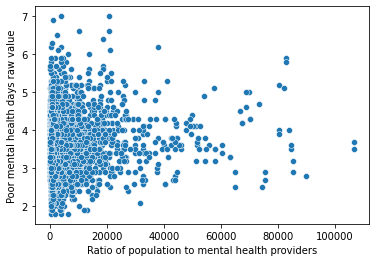

In [37]:
sns.scatterplot(data=df, x="Ratio of population to mental health providers", y="Poor mental health days raw value")

In [46]:
provider_sum = df["Ratio of population to mental health providers"].describe()
iqr = provider_sum["75%"] - provider_sum["25%"]
outlier_cutoff = provider_sum["75%"] + iqr*1.5
print(f"Cutoff: {outlier_cutoff}")
provider_sum

Cutoff: 12443.8653201975


count      4471.000000
mean       5261.542380
std        9547.357392
min          73.229508
25%         814.089787
50%        2097.539185
75%        5466.000000
max      106755.000000
Name: Ratio of population to mental health providers, dtype: float64

Look at correlation coefficient between mental health provider and poor mental health days for counties below cutoff

In [51]:
df.shape # shape before drop

(4471, 20)

In [52]:
no_outlier = (df["Ratio of population to mental health providers"] <= outlier_cutoff)
df = df[no_outlier]
df.shape # still decent

(4026, 20)

In [53]:
# Compute correlation coefficient again: even lower 
df[["Ratio of population to mental health providers", "Poor mental health days raw value"]].corr()

,Ratio of population to mental health providers,Poor mental health days raw value
Ratio of population to mental health providers,1.000000,0.042688
Poor mental health days raw value,0.042688,1.000000


<AxesSubplot:xlabel='Ratio of population to mental health providers', ylabel='Poor mental health days raw value'>

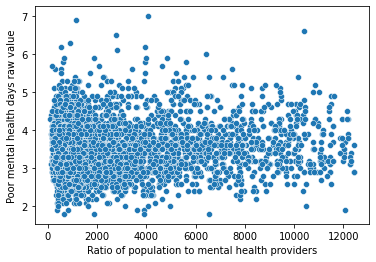

In [54]:
sns.scatterplot(data=df, x="Ratio of population to mental health providers", y="Poor mental health days raw value")

### Use median instead? Still bad!

                                                Ratio of population to mental health providers  \
Ratio of population to mental health providers                                        1.000000   
Poor mental health days raw value                                                    -0.071005   

                                                Poor mental health days raw value  
Ratio of population to mental health providers                          -0.071005  
Poor mental health days raw value                                        1.000000  


<AxesSubplot:xlabel='Ratio of population to mental health providers', ylabel='Poor mental health days raw value'>

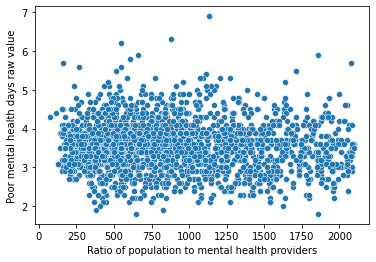

In [57]:
below_median = (df["Ratio of population to mental health providers"] <= provider_sum["50%"])
print(df.loc[below_median, ["Ratio of population to mental health providers", "Poor mental health days raw value"]].corr())
sns.scatterplot(data=df[below_median], x="Ratio of population to mental health providers", y="Poor mental health days raw value")

<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

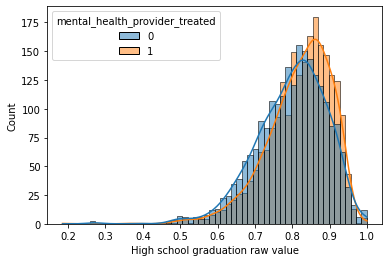

In [6]:
sns.histplot(data=df, x="High school graduation raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

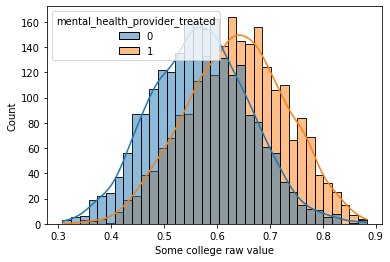

In [7]:
sns.histplot(data=df, x="Some college raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

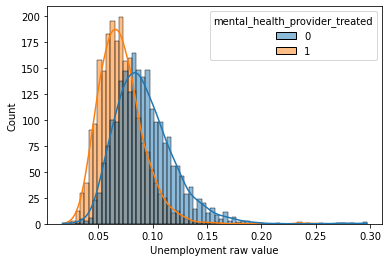

In [8]:
sns.histplot(data=df, x="Unemployment raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

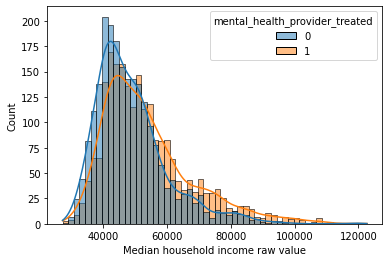

In [9]:
sns.histplot(data=df, x="Median household income raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

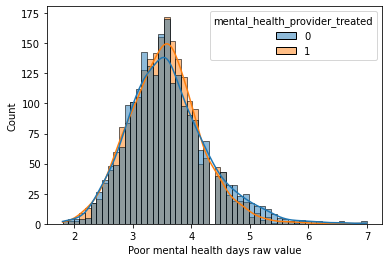

In [10]:
sns.histplot(data=df, x="Poor mental health days raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

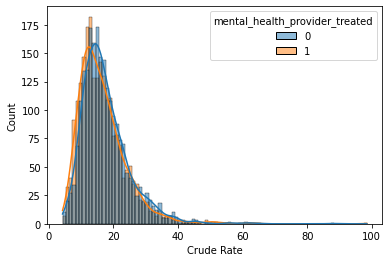

In [11]:
sns.histplot(data=df, x="Crude Rate", hue=categorize_treatment, kde=True)

In [12]:
df[categorize_treatment].value_counts()

0    2236
1    2235
Name: mental_health_provider_treated, dtype: int64

# Unadjusted ATE

In [13]:
# Unadjusted ATE - Poor mental health days
poor_mental_treated = df[df[categorize_treatment]== 1]['Poor mental health days raw value'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Poor mental health days raw value'].mean()
print("Higher unemployment = {:0.3f}".format(poor_mental_untreated))
print("Lower unemployment = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Higher unemployment = 3.606
Lower unemployment = 3.542
Difference in Sample Averages = -0.063


In [14]:
# Unadjusted ATE - Suicide rate
poor_mental_treated = df[df[categorize_treatment]== 1]['Crude Rate'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Crude Rate'].mean()
print("Higher unemployment = {:0.3f}".format(poor_mental_untreated))
print("Lower unemployment = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Higher unemployment = 17.606
Lower unemployment = 16.618
Difference in Sample Averages = -0.987


In [15]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [16]:
OLS_estimate(df['Poor mental health days raw value'], df[categorize_treatment])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                         nan
Model:                                           OLS   Adj. R-squared:                    nan
Method:                                Least Squares   F-statistic:                       nan
Date:                               Fri, 03 Dec 2021   Prob (F-statistic):                nan
Time:                                       10:57:27   Log-Likelihood:                    nan
No. Observations:                               4471   AIC:                               nan
Df Residuals:                                   4469   BIC:                               nan
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                     coef    std err        

### 1. Remove null poor mental health days

In [18]:
# Store rows without null values
df_mental = df[~null_vals]

In [19]:
# Try again
OLS_estimate(df_mental['Poor mental health days raw value'], df_mental[categorize_treatment])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.002
Model:                                           OLS   Adj. R-squared:                  0.002
Method:                                Least Squares   F-statistic:                     10.29
Date:                               Fri, 03 Dec 2021   Prob (F-statistic):            0.00135
Time:                                       10:57:32   Log-Likelihood:                -4460.0
No. Observations:                               4462   AIC:                             8924.
Df Residuals:                                   4460   BIC:                             8937.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                     coef    std err        

In [20]:
OLS_estimate(df['Crude Rate'], df[categorize_treatment])

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.16
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.23e-05
Time:                        10:57:41   Log-Likelihood:                -15376.
No. Observations:                4471   AIC:                         3.076e+04
Df Residuals:                    4469   BIC:                         3.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [21]:
df.groupby(categorize_treatment)['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])

C:\Users\alnli\AppData\Local\Temp/ipykernel_9624/729638201.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(categorize_treatment)['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])


,Crude Rate,Poor mental health days raw value,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Precipitation,RUCC
,mean,mean,mean,mean,mean,mean,mean,mean,mean
mental_health_provider_treated,,,,,,,,,
0,17.605859,3.605643,0.798186,0.092344,0.568535,9604.814879,48776.291592,3.511704,2.638193
1,16.618479,3.542485,0.819476,0.070684,0.636315,916.326583,53838.988814,3.541911,2.407606


Counties with lower unemployment rate have higher high school and college rates, more mental health providers, higher income, lower precipitation, more urban, lower poor mental health days, and lower rate of suicide.

# Linear Regressions
Should we still use unemployment? It seems like a really insignificant factor.

In [23]:
# Specification
outcome = df_mental['Poor mental health days raw value']
# Unemployment only: R^2 is pretty bad, but not sure how college is correlated with number of providers?
covariates = df_mental[[categorize_treatment, 'Unemployment raw value', 'Some college raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.254
Model:                                           OLS   Adj. R-squared:                  0.253
Method:                                Least Squares   F-statistic:                     505.6
Date:                               Fri, 03 Dec 2021   Prob (F-statistic):          8.92e-283
Time:                                       10:59:58   Log-Likelihood:                -3811.8
No. Observations:                               4462   AIC:                             7632.
Df Residuals:                                   4458   BIC:                             7657.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                     coef    std err        

## Propensity Score Matching

Optimization terminated successfully.
         Current function value: 0.578092
         Iterations 6


C:\Users\alnli\AppData\Local\Temp/ipykernel_9624/3343233173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pscore'] = result.predict(covariates)


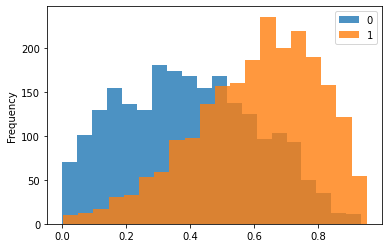

In [24]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby([categorize_treatment]).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df_mental, df_mental[categorize_treatment], df_mental[['Unemployment raw value', 'Some college raw value']] )

In [25]:
def trim(data):
    control_data = data[data[categorize_treatment] == 0]
    treat_data = data[data[categorize_treatment] == 1]

    min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
    max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

    min_support = max(min_control, min_treat)
    max_support = min(max_control, max_treat)

    trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]

    return trim_data

trim_df = trim(df_mental)
trim_df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
mental_health_provider_treated,,,,,,,,
0,2227.0,0.395052,0.209980,0.005073,0.223327,0.386806,0.544742,0.934685
1,2219.0,0.605156,0.192007,0.002086,0.480039,0.630265,0.753766,0.931904


### Perform nearest-neighbor matching

In [26]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df[categorize_treatment] == 1]
non_treated = trim_df[trim_df[categorize_treatment] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = 0.258


### Assess Balance

In [27]:
def compute_smd(covariates_table: pd.DataFrame, covariates: list, round_digits: int=4) -> pd.DataFrame:
    covariates_smds = []
    for var in covariates:
        covariates_values = covariates_table[var].values
        neg_mean = covariates_values[0, 0]
        neg_std = covariates_values[0, 1]
        pos_mean = covariates_values[1, 0]
        pos_std = covariates_values[1, 1]

        smd = (pos_mean - neg_mean) / np.sqrt((pos_std ** 2 + neg_std ** 2) / 2)
        smd = round(abs(smd), round_digits)
        covariates_smds.append(smd)

    return pd.DataFrame({'features': covariates, 'smd': covariates_smds})

In [29]:
covariates_list = ['Unemployment raw value', 'Some college raw value']
agg_operations = {categorize_treatment: 'count'}
agg_operations.update({
    covariate: ['mean', 'std'] for covariate in covariates_list
})

# Combine treated and matched_df
covariates_table = pd.concat([treated, matched_df]).groupby(categorize_treatment).agg(agg_operations)
covariates_table.head()

mental_health_provider_treated  \
                                                        count   
mental_health_provider_treated                                  
0                                                        2219   
1                                                        2219   

                               Unemployment raw value            \
                                                 mean       std   
mental_health_provider_treated                                    
0                                            0.070977  0.020084   
1                                            0.070880  0.020758   

                               Some college raw value            
                                                 mean       std  
mental_health_provider_treated                                   
0                                            0.636399  0.098604  
1                                            0.635493  0.093179

In [30]:
# standardize mean difference, <= 0.25
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                 features     smd
0  Unemployment raw value  0.0048
1  Some college raw value  0.0094


### stratification matching

In [31]:
def stratified_matching(data):
    mybins = np.arange(0.0, 1.1, 0.1)
    mylabels = np.arange(1, 11)
    data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

    # calculate the weights for each strata
    strata_w = data[data[categorize_treatment] == 1].groupby('strata').size()/data[data[categorize_treatment] == 1].groupby('strata').size().sum()

    # calculate the ATT for each strata
    strata_ate = data[data[categorize_treatment] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data[categorize_treatment] == 0].groupby('strata')['Poor mental health days raw value'].mean()

    # stratefied matching estimate 
    stratefied_ate = (strata_w * strata_ate).sum()  
    print("The stratification matching estimate is {}".format(round(stratefied_ate, 3)))
    return strata_w, strata_ate
  
strata_w, strata_ate = stratified_matching(trim_df)

The stratification matching estimate is 0.243


C:\Users\alnli\AppData\Local\Temp/ipykernel_9624/3729324588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


In [32]:
strata_w

strata
1     0.010365
2     0.022983
3     0.042361
4     0.078864
5     0.130239
6     0.150518
7     0.205498
8     0.198288
9     0.137449
10    0.023434
dtype: float64

In [33]:
trim_df.shape

(4446, 22)

Compute smd for strata 4~8

In [34]:
# Combine treated and matched_df
positions = (trim_df['strata'] >= 4) & (trim_df['strata'] <= 8)
covariates_table = (trim_df[positions]).groupby(categorize_treatment).agg(agg_operations)
covariates_table.head()

mental_health_provider_treated  \
                                                        count   
mental_health_provider_treated                                  
0                                                        1394   
1                                                        1694   

                               Unemployment raw value            \
                                                 mean       std   
mental_health_provider_treated                                    
0                                            0.078423  0.014095   
1                                            0.071527  0.014067   

                               Some college raw value            
                                                 mean       std  
mental_health_provider_treated                                   
0                                            0.595195  0.080671  
1                                            0.623320  0.077354

In [35]:
# standardize mean difference, <= 0.25
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                 features     smd
0  Unemployment raw value  0.4898
1  Some college raw value  0.3559


### Inverse Probability Weighted Matching (IPW)

In [36]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, categorize_treatment, 'Poor mental health days raw value' , 'pscore'), 3)

1.451

### Conclusion: Cannot use Unemployment